# Introduction

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [2]:
col_names = ['sentiment', 'ids', 'date', 'flag', 'user', 'text']
col_taken = ['sentiment', 'text']

df = pd.read_csv('Twit_sentiment.csv', encoding='ISO-8859-1', names=col_names, usecols=col_taken)

df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [3]:
sample_size = 10000
df1 = pd.concat([df.head(sample_size), df.tail(sample_size)])

# Normalize the sentiment into 0 and 1 (Not 4)

This might helps in computation where squaring 4 and adding 16 each time might be costly than the adding 1. 

In [4]:
df1['sentiment'] = df1['sentiment']/4

In [5]:
df1.tail()

,sentiment,text
1599995,1.0,Just woke up. Having no school is the best fee...
1599996,1.0,TheWDB.com - Very cool to hear old Walt interv...
1599997,1.0,Are you ready for your MoJo Makeover? Ask me f...
1599998,1.0,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1.0,happy #charitytuesday @theNSPCC @SparksCharity...


# Data clearning 

In [4]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(stemmer.stem(token))
    return ' '.join(tokens)

df1['text'] = df1['text'].apply(preprocess)

# How many words are there in average in each tweet?

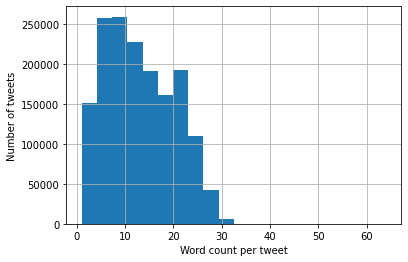

In [46]:
word_count = df['text'].str.split().str.len()
word_count.hist(bins=20)
plt.xlabel('Word count per tweet')
plt.ylabel('Number of tweets')
plt.show()

In [55]:
len(word_count > 35)

1600000

In [51]:
df[word_count > 35]

,sentiment,text
109664,0,"Who Am I Lying ! ? ! I Know , You Know , We Al..."
336344,0,"I never get 2 c u as often as I like,I never g..."
374042,0,"I hate this , why does he have to be my step c..."
461028,0,Is the saddest zornes ever thanks to the magic...
461273,0,Ok ok . . . lol . . . I was gonna tell u . . ....
526581,0,@LaurenConrad â â â â¥ â¥ â¥ L.A. Candy...
532718,0,"Okay I'm Up - I'm Up! Wow, the sun is out, the..."
582335,0,So AT&amp;T cnt kp up wit all the tweets I rcv...
675528,0,Tá»i hum wa mÃ¬nh ko tÃ i nÃ o ngá»§ ÄÆ°á»£c...
770356,0,I'm so boreeeeed. . . . . . . . . . . . . . . ...


In [61]:
df = df[word_count < 35]

df['sentiment'].value_counts()

4    799979
0    799976
Name: sentiment, dtype: int64

In [60]:
sample_size = 10000
df1 = pd.concat([df.head(sample_size), df.tail(sample_size)])

# Vizualize the top used words to get an idea of how many words to keep in the word vector. 

- Length of the word vector at max can be equal to the total number of words in english dictionary. 1000 might be the good vector to consider. But check it. 

- If the plan is to use in other text data the words appearing in tweet might not the be the good indicator of the most frequent words in other form of texts, eg. news, book etc. 

In [6]:
word_count = df['text'].str.split(expand=True).stack().value_counts()
print('Total number of words in the dataset: \t', len(word_count))

Total number of words in the dataset: 	 1350598


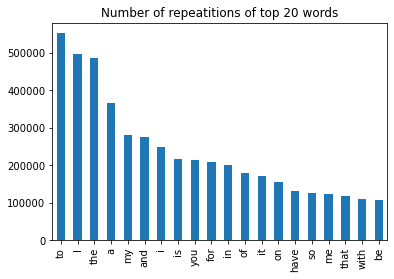

In [7]:
word_count.head(20).plot.bar()
plt.title('Number of repeatitions of top 20 words')
plt.show()

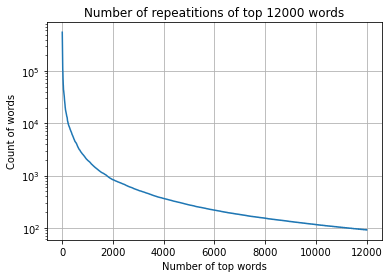

In [8]:
arr = word_count.values

plt.plot(arr[:12000])
plt.yscale('log')
plt.xlabel('Number of top words')
plt.ylabel('Count of words')
plt.title('Number of repeatitions of top 12000 words')
plt.grid()

If we choose top 12000 words they repeat approximately 100 times at least. Top top 2000 words repeat at least 800 times and top 500 words repeats at least 5000 times. There are 1600000 samples. So repeating a word 16000 times means that word appearing in 1% of the sample. Therefore, if we choose top 500 words the least repeated word appears in 0.3% of the sample and if we choose top 2000 words the least repeated word appears in 0.05% of the sample. To imphesize least repeated word of top 2000 word appear only once in each 2000 tweet. So top 1000 or 2000 sample must be enough.

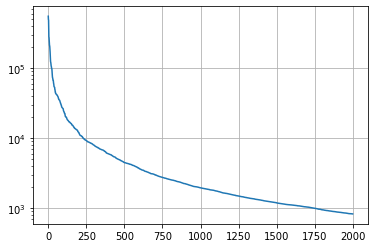

In [9]:
plt.plot(arr[:2000])
plt.yscale('log')
plt.grid()

## It is fine upto here

-- In future need to do all the preprocessing inside the pipeline. But it is OK for now. 

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

from xgboost import XGBClassifier

# Use customize the validation data: because the dataset is very large. 5 fold cross valdiation is not needed. Small set would do. 

In [6]:
X = df1['text']
y = df1['sentiment']

X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainvalid, y_trainvalid, test_size=0.3)

print('Train data size: \t', X_train.shape[0], 
      '\nValidation data size: \t', X_valid.shape[0], 
      '\nTest data size: \t', X_test.shape[0])

test_fold = [0 if x in X_valid.index else -1 for x in X_trainvalid.index]

ps = PredefinedSplit(test_fold)

Train data size: 	 9800 
Validation data size: 	 4200 
Test data size: 	 6000


# Ensemble learning 

Write what is ensemble learning 

### Bagging: Random forest classifier 

Introduce what is baggin?

Please not that we are not using the naive bagging here. Instead we use the random forest. 

What is Random forest?

What is bootstrap?


In [7]:
n_words = [500]
n_trees = [100]

parameters = {'max_features':n_words, 
              'n_estimators':n_trees}

vector = TfidfVectorizer()
rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters, 
                  cv=ps, refit=True, 
                  n_jobs=-1)

rf_pipeline = Pipeline(steps=[('vec', vector),('clf', clf)])

rf_pipeline.fit(X_trainvalid, y_trainvalid)
rf_pipeline.score(X_test, y_test)

0.7245

### Boosting: XGBoost 

What is boosting in general? 

It is an concept not necessirily related to the tree based model. 

We use three boosting models here: XGBoost, LGBM, cratBoost 

We are not using adaBoost, gradientBoosting from sklearn 

In [8]:
n_words = [500]
n_trees = [500]
l_rate = [0.1]

parameters = {'max_features':n_words, 
              'n_estimators':n_trees, 
              'learning_rate':l_rate}

vector = TfidfVectorizer()
xgb = XGBClassifier(eval_set=[X_valid, y_valid], 
                   early_stopping_rounds=[3])

clf = GridSearchCV(xgb, parameters, 
                  cv=ps, refit=True, 
                  n_jobs=-1)

xgb_pipeline = Pipeline(steps=[('vec', vector),('clf', clf)])

xgb_pipeline.fit(X_trainvalid, y_trainvalid)
xgb_pipeline.score(X_test, y_test)

0.7226666666666667

### Stacking 

Stacking is another form of ensemble learning. In the simplest from stacking means take the predictions from various models and average them out for the final predictions. 

$$ pred_{stack} = \frac{pred_{model_1} + pred_{model_2} + \cdots pred_{model_N}}{N} $$

In most of the cases this already gives a better performance than the performance of the individual models. But we can do better than this introducing a more sofisticated stacking scheme. In thins approach we take the predictions from each model as the new features (input) of the new dataset. The target variable is again the same. We then choose another model to fit these data.  

##### Now a question is why this approach works? 
In many optimization problem the cost function is not a convex function. Meaning that there might not be a single global minima but there can be multiple global minima and even higher number of local minima. In extremely high dimensional space of the data those individual global minima can be connected to each other through what we might called a flat topological valley. When you reach at the edge of the downhill of the valley you find the minima. You can not minimize the loss function further because the gradients are already zero. In a sense it is already optimized but the more robost model exist at the middle of the flat valley. In this sense model-I might have reached the valley from one end while model-II might have reached there from different end. Averaging them take you to the center of the valley. This concept is illustrated in the plot below: 


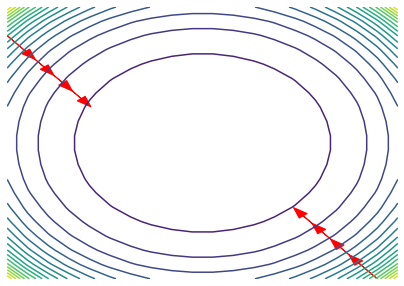

In [87]:
grids = np.linspace(-1.2, 1.2, 20)
xgrid, ygrid = np.meshgrid(grids, grids)
zgrid = np.exp((xgrid**2 + ygrid**2))
cont_loc = np.linspace(0, np.max(zgrid), 20)

def arror_series(x_start=0, y_start=0, x_incr=1, y_incr=1):
    for i in range(4):
        plt.arrow(x_start, y_start, x_incr, y_incr, head_width=0.5, fc='r', ec='r')
        x_start += x_incr
        y_start += y_incr  

plt.figure(figsize=(7, 5))
plt.contour(zgrid, cont_loc)
plt.axis('off')

arror_series(y_start=17, x_incr=0.9, y_incr=-1.1)
arror_series(x_start=18, x_incr=-0.9, y_incr=1.1)
plt.show()

 

There is sklearn API for doing only the second type of stacking. So let's do the first type of stacking manually. 

In [9]:
proba_xgb = xgb_pipeline.predict_proba(X_test)
proba_rf = rf_pipeline.predict_proba(X_test)

pred_rf = np.round(proba_rf[:, 1])
pred_xgb = np.round(proba_xgb[:, 1])

pred_tot = np.round((proba_rf[:,1] + proba_xgb[:,1])/2)

print(np.sum(np.abs(pred_rf - pred_xgb)))
print(np.sum(np.abs(pred_rf - y_test)))
print(np.sum(np.abs(pred_xgb - y_test)))
print(np.sum(np.abs(pred_tot - y_test)))

961.0
10680.0
10691.0
10629.0


In [11]:
stack = StackingClassifier(
                    estimators=[('rf', rf_pipeline), 
                                ('xgb', xgb_pipeline)],     
                    cv=ps, 
                    n_jobs=-1)

stack.fit(X_trainvalid, y_trainvalid)
stack.score(X_test, y_test)

75.34

# Future direction 

- LGBM 
- XGB with linear model 
- RNN 